<a href="https://colab.research.google.com/github/Vineet2107/ML-for-Civil-Engineering-CE784A-/blob/main/Copy_of_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Mon Jul 11 18:51:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/MyDrive/P8-DATA")

In [5]:
!pwd

/content/drive/.shortcut-targets-by-id/1qh_OjbxzwDcPrU9q2Qp0DH63dOnyo1XE/P8-DATA


In [ ]:
! unzip /content/drive/MyDrive/P8-DATA/archive.zip

In [12]:
import cv2

In [40]:
img = cv2.imread('/content/drive/MyDrive/P8-DATA/traffic_Data/DATA/15/015_0001.png')

In [37]:
# img = image.load_img('/content/drive/MyDrive/P8-DATA/traffic_Data/DATA/15/015_0001.png', grayscale=True, target_size=(224, 224))
# img = image.img_to_array(img, dtype='uint8')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


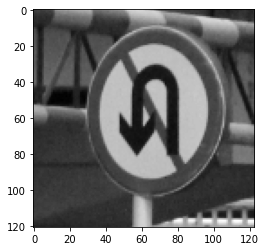

In [41]:
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg, cmap = 'gray')
plt.show()

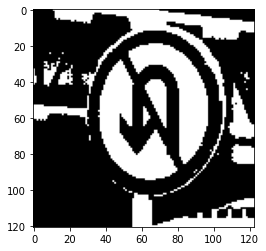

In [50]:
# perform image thresholding
ret, thresh = cv2.threshold(grayimg, 100, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

In [42]:
from keras.preprocessing import image
img = image.img_to_array(img, dtype='uint8')

In [43]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
# img = cv.imread('sudoku.png',0)
# img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

error: ignored

In [30]:
img = image.img_to_array(img, dtype='uint8')

print(img.shape)
## output : (224,224,3)
#plt.imshow(img_grey)

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.figure(figsize=(20,10))
plt.imshow(th3, cmap="gray")
plt.show()

(121, 123, 3)


error: ignored

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(224, 224, 1)


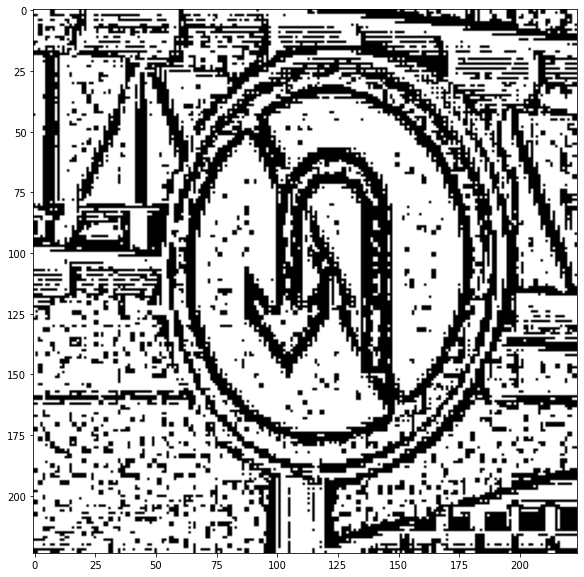

In [31]:
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

img = image.load_img('/content/drive/MyDrive/P8-DATA/traffic_Data/DATA/15/015_0001.png', grayscale=True, target_size=(224, 224))
img = image.img_to_array(img, dtype='uint8')

print(img.shape)
## output : (224,224,3)
#plt.imshow(img_grey)

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.figure(figsize=(20,10))
plt.imshow(th3, cmap="gray")
plt.show()


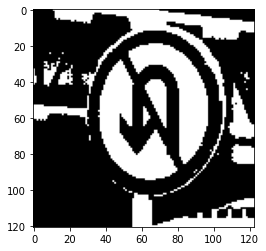

In [21]:
ret, thresh = cv2.threshold(grayimg, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap = 'gray')
plt.show()

In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np
import os
import PIL
import PIL.Image

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Flatten,Dense, Dropout

In [8]:
data_dir = '/content/drive/MyDrive/P8-DATA/traffic_Data/DATA'


BATCH_SIZE = 32


train_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            )


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  batch_size=8)



normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Found 4170 files belonging to 58 classes.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [9]:
len(os.listdir("/content/drive/MyDrive/P8-DATA/traffic_Data/DATA"))

58

In [10]:
num_classes = 58

model = tf.keras.Sequential([
  
  # tf.keras.layers.BatchNormalization(),
  # tf.keras.layers.Conv2D(64, 3, activation='relu'),
  # tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Dropout((0.2)),
  # tf.keras.layers.BatchNormalization(),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(num_classes,activation = 'softmax')
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25
)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


131/131 [==============================] - 19s 113ms/step - loss: 37.6249 - accuracy: 0.6518 - val_loss: 27.5945 - val_accuracy: 0.8010
Epoch 2/25
131/131 [==============================] - 4s 30ms/step - loss: 13.8334 - accuracy: 0.8600 - val_loss: 8.2907 - val_accuracy: 0.9065
Epoch 3/25
131/131 [==============================] - 4s 31ms/step - loss: 8.4968 - accuracy: 0.9026 - val_loss: 5.0758 - val_accuracy: 0.9472
Epoch 4/25
131/131 [==============================] - 4s 32ms/step - loss: 5.2050 - accuracy: 0.9345 - val_loss: 2.9042 - val_accuracy: 0.9520
Epoch 5/25
131/131 [==============================] - 4s 31ms/step - loss: 3.8328 - accuracy: 0.9520 - val_loss: 3.2471 - val_accuracy: 0.9580
Epoch 6/25
131/131 [==============================] - 4s 31ms/step - loss: 3.9276 - accuracy: 0.9460 - val_loss: 3.2583 - val_accuracy: 0.9628
Epoch 7/25
131/131 [==============================] - 4s 31ms/step - loss: 4.2686 - accuracy: 0.9549 - val_loss: 4.4463 - val_accuracy: 0.9640
Epoch